In [2]:
pip install pandas numpy matplotlib seaborn scikit-learn

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA

In [13]:
df= pd.read_csv('utilities.csv')
df.columns = df.columns.str.strip()


In [14]:
# Limpieza de nombres de columnas
columnas_limpias = df.columns.str.strip()
df.columns = columnas_limpias

# Variables numéricas para clustering
features = ["Fixed", "RoR", "Cost", "Load", "Demand", "Sales", "Nuclear", "Fuel Cost"]
X = df[features]

# Estadísticas antes de la normalización
print("=== Estadísticas originales ===")
print(X.describe())



=== Estadísticas originales ===
           Fixed        RoR        Cost       Load     Demand         Sales  \
count  22.000000  22.000000   22.000000  22.000000  22.000000     22.000000   
mean    1.114091  10.736364  168.181818  56.977273   3.240909   8914.045455   
std     0.184511   2.244049   41.191349   4.461148   3.118250   3549.984031   
min     0.750000   6.400000   96.000000  49.800000  -2.200000   3300.000000   
25%     1.042500   9.200000  148.500000  53.775000   1.450000   6458.250000   
50%     1.110000  11.050000  170.500000  56.350000   3.000000   8024.000000   
75%     1.190000  12.350000  195.750000  60.300000   5.350000  10128.250000   
max     1.490000  15.400000  252.000000  67.600000   9.200000  17441.000000   

        Nuclear  Fuel Cost  
count  22.00000  22.000000  
mean   12.00000   1.102727  
std    16.79192   0.556098  
min     0.00000   0.309000  
25%     0.00000   0.630000  
50%     0.00000   0.960000  
75%    24.60000   1.516250  
max    50.20000   2.1160

In [15]:
# Normalización
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Convertimos a DataFrame para inspección
X_scaled_df = pd.DataFrame(X_scaled, columns=features)

# Estadísticas después de la normalización
print("\n=== Estadísticas después de la normalización ===")
print(X_scaled_df.describe())

# También puedes ver mínimos y máximos originales comparados con los normalizados:
print("\n=== Comparación de valores mínimos y máximos ===")
for col in features:
    print(f"{col}: original min={X[col].min()}, max={X[col].max()} | escalado min={X_scaled_df[col].min():.2f}, max={X_scaled_df[col].max():.2f}")


=== Estadísticas después de la normalización ===
              Fixed           RoR          Cost          Load        Demand  \
count  2.200000e+01  2.200000e+01  2.200000e+01  2.200000e+01  2.200000e+01   
mean   4.264266e-16 -5.046468e-18 -1.589638e-16  4.037175e-17 -2.624164e-16   
std    1.023533e+00  1.023533e+00  1.023533e+00  1.023533e+00  1.023533e+00   
min   -2.019709e+00 -1.977857e+00 -1.793591e+00 -1.646700e+00 -1.785921e+00   
25%   -3.971338e-01 -7.007503e-01 -4.890586e-01 -7.347057e-01 -5.878469e-01   
50%   -2.269336e-02  1.430526e-01  5.760274e-02 -1.439168e-01 -7.907586e-02   
75%    4.210880e-01  7.359952e-01  6.850209e-01  7.623419e-01  6.922868e-01   
max    2.085268e+00  2.127130e+00  2.082734e+00  2.437200e+00  1.956008e+00   

              Sales       Nuclear     Fuel Cost  
count  2.200000e+01  2.200000e+01  2.200000e+01  
mean   1.413011e-16  5.046468e-17 -7.569702e-17  
std    1.023533e+00  1.023533e+00  1.023533e+00  
min   -1.618644e+00 -7.314465e-01 -1.4

{'icoord': [[5.0, 5.0, 15.0, 15.0],
  [25.0, 25.0, 35.0, 35.0],
  [10.0, 10.0, 30.0, 30.0],
  [65.0, 65.0, 75.0, 75.0],
  [55.0, 55.0, 70.0, 70.0],
  [45.0, 45.0, 62.5, 62.5],
  [85.0, 85.0, 95.0, 95.0],
  [115.0, 115.0, 125.0, 125.0],
  [105.0, 105.0, 120.0, 120.0],
  [90.0, 90.0, 112.5, 112.5],
  [53.75, 53.75, 101.25, 101.25],
  [20.0, 20.0, 77.5, 77.5],
  [145.0, 145.0, 155.0, 155.0],
  [135.0, 135.0, 150.0, 150.0],
  [185.0, 185.0, 195.0, 195.0],
  [175.0, 175.0, 190.0, 190.0],
  [165.0, 165.0, 182.5, 182.5],
  [205.0, 205.0, 215.0, 215.0],
  [173.75, 173.75, 210.0, 210.0],
  [142.5, 142.5, 191.875, 191.875],
  [48.75, 48.75, 167.1875, 167.1875]],
 'dcoord': [[0.0,
   np.float64(3.2301954617958915),
   np.float64(3.2301954617958915),
   0.0],
  [0.0, np.float64(5.063618000406149), np.float64(5.063618000406149), 0.0],
  [np.float64(3.2301954617958915),
   np.float64(6.596168854388714),
   np.float64(6.596168854388714),
   np.float64(5.063618000406149)],
  [0.0, np.float64(3.2773060

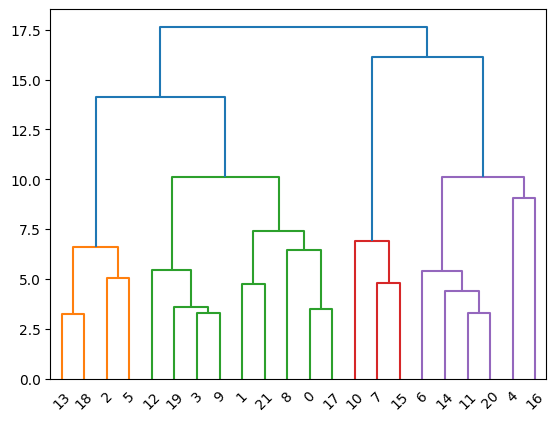

In [22]:
#Distancia
from sklearn.metrics.pairwise import pairwise_distances
from scipy.cluster.hierarchy import dendrogram, linkage

d = pairwise_distances(X_scaled_df, metric='euclidean')

dendrogram(linkage(d, method='ward'), labels=X_scaled_df.index)
